<a href="https://colab.research.google.com/github/hermesfeet/ML-Learning/blob/master/Linear_Regression_Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Example
1) Show with Normal Equation

2) Show with Gradient Descent

In [0]:
import numpy as np

In [0]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

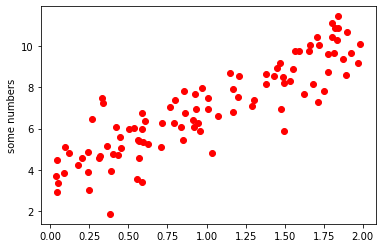

In [5]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'ro')
plt.ylabel('some numbers')
plt.show()


In [6]:
# 1a) Normal Equation
X_b = np.c_[np.ones((100,1)), X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.71076571],
       [3.25096014]])

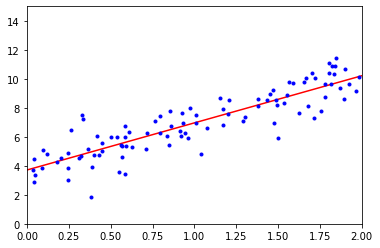

In [8]:
# Make prediction using Theta-Hat
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict 

plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
# 1a) Normal Equation w/ Scikit Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)


array([[ 3.71076571],
       [10.21268599]])

In [13]:
# 2a) Full Batch Gradient Descent
alpha = 0.1 # learning rate
n_iterations = 1000
m = 100 #samples

theta = np.random.randn(2,1)

for iteration in range (n_iterations):
  gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - alpha * gradients

theta

array([[3.71076571],
       [3.25096014]])

In [19]:
# 2b) Stochastic Single Example Gradient Descent
n_epochs = 200
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index +1]
    yi = y[random_index:random_index +1]
    gradients = 2*xi.T.dot(xi.dot(theta) - yi)
    alpha = learning_schedule(epoch * m * i)
    theta = theta - alpha * gradients

theta

array([[3.76900647],
       [3.4361461 ]])

In [18]:
# 2b) Stochastic Single Example Gradient Descent with SKLearn
from sklearn.linear_model import SGDRegressor

sgd_reg =  SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_


(array([3.70350979]), array([3.25706798]))